In [6]:
import laserhockey.hockey_env as h_env
import numpy as np
import pylab as plt
import gymnasium as gym
from importlib import reload
import time
from IPython import display
import random

In [7]:
np.set_printoptions(suppress=True)
reload(h_env)

/root/miniconda3/envs/rl/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment Hockey-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/root/miniconda3/envs/rl/lib/python3.11/site-packages/gymnasium/envs/registration.py:693: UserWarning: WARN: Overriding environment Hockey-One-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")


<module 'laserhockey.hockey_env' from '/root/miniconda3/envs/rl/lib/python3.11/site-packages/laserhockey/hockey_env.py'>

In [8]:
env = h_env.HockeyEnv()

In [9]:
obs,info = env.reset()
obs_agent2 = env.obs_agent_two()
_ = env.render(mode = "human")

In [10]:
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()

for _ in range(600):
    env.render(mode="human")
    a1 = np.random.uniform(-1,1,4)
    a2 = np.random.uniform(-1,1,4)    
    obs, r, d, t, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

In [11]:
info

{'winner': 1,
 'reward_closeness_to_puck': 0,
 'reward_touch_puck': 0.0,
 'reward_puck_direction': 0.0007428638458251953}

In [12]:
env.close()

Shooting

In [15]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [16]:
o, info = env.reset()
_ = env.render()

for _ in range(50):
    env.render()
    a1 = [1,0,0,1] # np.random.uniform(-1,1,4)
    a2 = [0,0.,0,0] 
    obs, r, d, _ , info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break

env.close()

Defending

In [20]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_DEFENSE)

In [21]:
o, info = env.reset()
_ = env.render()

for _ in range(160):
    env.render()
    a1 = [0.1,0,0,1] # np.random.uniform(-1,1,3)
    a2 = [0,0.,0,0] 
    obs, r, d,_, info = env.step(np.hstack([a1,a2]))
    print(r)
    obs_agent2 = env.obs_agent_two()
    if d: break

env.close()

-0.38437666269775195
-0.211064402630494
-0.07357865165683015
-0.04844410991213049
-0.13572822193058356
0
0
0
0
0
0
0
0
0
0
0
10


discrete actions

In [22]:
env = h_env.HockeyEnv(mode=h_env.HockeyEnv.TRAIN_SHOOTING)

In [23]:
env.reset()
for _ in range(200):
    env.render()
    a1_discrete = random.randint(0,7)
    a1 = env.discrete_to_continous_action(a1_discrete)
    a2 = [0,0.,0,0 ] 
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break
    
env.close()

Own Opponents

In [24]:
env = h_env.HockeyEnv()

In [25]:
o, info = env.reset()
_ = env.render()
player1 = h_env.BasicOpponent(weak=False)
player2 = h_env.BasicOpponent()

In [26]:
obs_buffer = []
reward_buffer=[]
obs, info = env.reset()
obs_agent2 = env.obs_agent_two()
for _ in range(250):
    env.render()
    a1 = player1.act(obs)
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_buffer.append(obs)
    reward_buffer.append(r)
    obs_agent2 = env.obs_agent_two()
    if d: break
obs_buffer = np.asarray(obs_buffer)
reward_buffer = np.asarray(reward_buffer)

In [27]:
print(np.mean(obs_buffer,axis=0))
print(np.std(obs_buffer,axis=0))

[-3.1866571  -0.05447171  0.00585037 -0.09268976 -0.19243486 -0.26113999
  3.13577371 -0.19286764  0.07089568  0.14644814 -0.0081089   0.02669454
 -0.33939975 -0.27858394 -0.18226983  0.99999037  1.875       0.        ]
[ 0.48768988  0.91921818  0.65760237  3.2966065   5.23079316  3.59543364
  0.42674433  0.27061491  0.14316338  2.76304876  1.26311966  0.69219969
  2.12083227  1.61084058 16.13065681 11.58091998  4.20060582  0.        ]


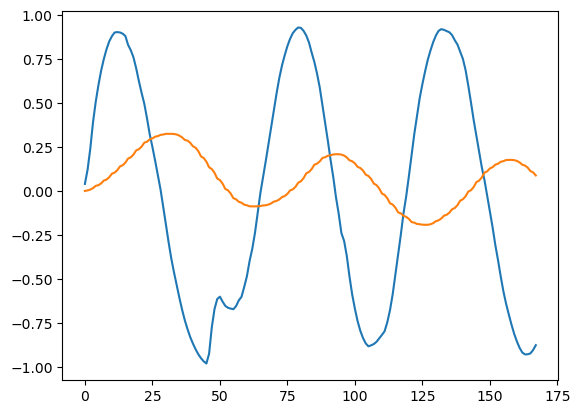

In [28]:
scaling = [ 1.0,  1.0 , 0.5, 4.0, 4.0, 4.0,  
            1.0,  1.0,  0.5, 4.0, 4.0, 4.0,  
            2.0, 2.0, 10.0, 10.0, 4,0 ,4,0]



plt.plot(obs_buffer[:,2])
plt.plot(obs_buffer[:,8])

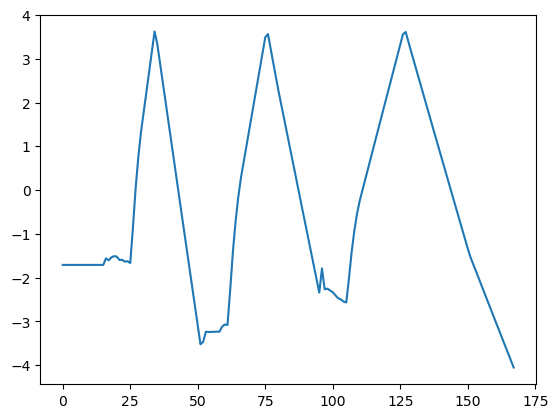

In [29]:
plt.plot(obs_buffer[:,12])

-16.083370902969143


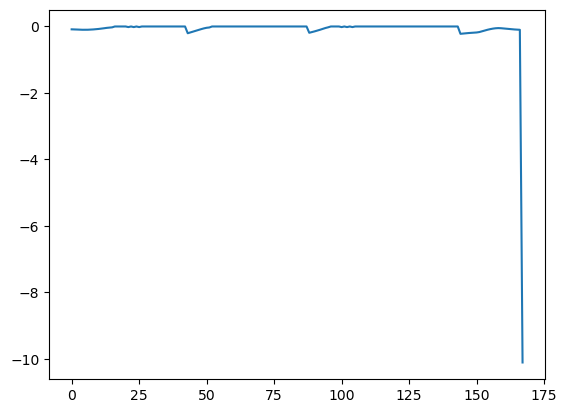

In [30]:
plt.plot(reward_buffer[:])
print(np.sum(reward_buffer[:]))
env.close()

Human Opponent

In [31]:
env = h_env.HockeyEnv()

player1 = h_env.HumanOpponent(env=env, player=1)
player2 = h_env.BasicOpponent()

player1 = h_env.BasicOpponent()
player2 = h_env.HumanOpponent(env=env, player=2)

obs, info = env.reset()

env.render()
time.sleep(1)
obs_agent2 = env.obs_agent_two()
for _ in range(100):
    time.sleep(0.2)
    env.render()
    a1 = player1.act(obs) 
    a2 = player2.act(obs_agent2)
    obs, r, d, _, info = env.step(np.hstack([a1,a2]))    
    obs_agent2 = env.obs_agent_two()
    if d: break
env.close()

Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space
Human Controls:
 left:			left arrow key left
 right:			arrow key right
 up:			arrow key up
 down:			arrow key down
 tilt clockwise:	w
 tilt anti-clockwise:	s
 shoot :	space
